In [180]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

Activation Functions

In [181]:
def sigmoid(x):
    return (1.0 / (1.0 + np.exp(-x)))

In [182]:
def tanh(x):
    return ((np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)))

In [183]:
def ReLU(x):
    return np.maximum(x,0)

In [184]:
def LReLU(x, a = 0.1):
    return np.maximum(np.multiply(a, x), x)

Derivatives of Activation Functions

In [185]:
def d_ReLU(x):
    return np.multiply((x > 0), np.ones(np.shape(x)))

In [186]:
def d_sigmoid(x):
    y = np.multiply(x, (1.0 - x))
    return y

In [187]:
def d_tanh(x):
    return(1 - np.multiply(x, x))

In [188]:
def d_LReLU(x, a = 0.1):
    return (((x > 0) * np.ones(np.shape(x))) + ((x < 0) * np.full(np.shape(x), a)))

Error Functions

In [189]:
def MSE(y_hat, y):
    return np.mean((((y_hat - y) ** 2) / 2.0), axis = 1)

In [190]:
# mean absolute percentage error
def MAPE(y_hat, y):
    return np.mean(np.absolute(np.divide((y_hat - y), y_hat)), axis = 1)

Normalization Function

In [191]:
def normalisation(x):
  mean = np.mean(x, axis=0);
  sigma = np.std(x, axis=0);
  return (x-mean)/sigma

Initializing the parameters

In [192]:
def initialize_parameters(Features, HiddenLayerNodes, noOfLayers):
  params = {}

  #Input Layer
  W1 = np.random.randn(HiddenLayerNodes, Features)
  b1 = np.zeros((HiddenLayerNodes, 1))
  params.update({'W1': W1})
  params.update({'b1': b1})

  for layer in range(noOfLayers-1):
    W_layer = np.random.randn(HiddenLayerNodes, HiddenLayerNodes)
    b_layer = np.zeros((HiddenLayerNodes, 1))

    params.update({'W'+str(layer+2): W_layer})
    params.update({'b'+str(layer+2): b_layer})


  #Output Layer
  W_out = np.random.randn(1, HiddenLayerNodes)
  b_out = np.zeros((1, 1))
  params.update({'W'+str(noOfLayers+1): W_out})
  params.update({'b'+str(noOfLayers+1): b_out})


  return params


Forward Propogation

In [193]:
def forward_propagation(Input, y_expected, noOfLayers, params, Activations, Error='MSE'):
  '''
  Input : Features * TrainingExamples
  W1 : HiddenLayerNodes * Features
  b1 : HiddenLayerNodes * 1
  A1 : HiddenLayerNodes * TrainingExamples

  Wi : HiddenLayerNodes * HiddenLayerNodes    [OutputLayerNodes = 1]
  bi : HiddenLayerNodes * 1
  Ai : HiddenLayerNodes * TrainingExamples

  W_L+1 : 1 * HiddenLayerNodes
  b_L+1 : 1 * 1
  A_L+1 : 1 * TrainingExamples

  '''

  Features, TrainingExamples = Input.shape
  HiddenLayerNodes = params['W1'].shape[0]
  cache = {}
  cache.update({'A0':Input})

  for layer in range(1, noOfLayers+1):
      W_i = params['W'+str(layer)]
      b_i = params['b'+str(layer)]

      A_prev = cache['A'+str(layer-1)]
      Z_i = W_i @ A_prev + b_i
      A_i = np.zeros((HiddenLayerNodes, TrainingExamples))

      Activation_i = Activations[layer-1]
      if Activation_i == 'sigmoid':
        A_i = sigmoid(Z_i)
      elif Activation_i == 'tanh':
        A_i = tanh(Z_i)
      elif Activation_i == 'ReLU':
        A_i = ReLU(Z_i)
      elif Activation_i == 'LReLU':
        A_i = LReLU(Z_i)
      else:
        print("Invalid Activation for Layer ", layer)
        return

      cache.update({'A'+str(layer) : A_i})
  

  #output layer
  W_out = params['W'+str(noOfLayers+1)]
  b_out = params['b'+str(noOfLayers+1)]
  A_prev = cache['A'+str(noOfLayers)]
  Z_out =  W_out @ A_prev + b_out
  Activation_out = Activations[noOfLayers]

  if Activation_out == 'sigmoid':
    A_out = sigmoid(Z_out)
  elif Activation_out == 'tanh':
    A_out = tanh(Z_out)
  elif Activation_out == 'ReLU':
    A_out = ReLU(Z_out)
  elif Activation_out == 'LReLU':
    A_out = LReLU(Z_out)
  else:
    print("Invalid Activation for Layer ", noOfLayers)
    return

  cache.update({'A'+str(noOfLayers+1) : A_out})


  error = 0

  if Error == "MSE":
     error = MSE(A_out,y_expected)
  elif Error == "MAPE":
     error = MAPE(A_out, y_expected)
  else:
    print("Invalid Error Function")
    return

  return cache, error


Backward Propogation

In [194]:
def backward_propagation(params, cache, y_expected, Activations, noOfLayers, learning_rate = 0.1, Error = 'MSE'):

  A_out = cache['A'+str(noOfLayers+1)]
  d_A_out = np.zeros(np.shape(A_out))
  d_Z_out = np.zeros(np.shape(A_out)) # 1 * TrainingExamples
  d_W_out = cache['A'+str(noOfLayers)] # HiddenLayerNodes * TrainingExamples

  if Error == 'MSE':
    d_A_out = (y_expected - A_out)/np.shape(A_out)[1]
  elif Error == 'MAPE':
    d_A_out = np.divide(np.sign((y_expected - A_out)), np.absolute(A_out))
  else :
    print("Invalid Error Function")
    return
    
  Activation_out = Activations[noOfLayers]

  if Activation_out == 'sigmoid':
    d_Z_out = d_sigmoid(A_out)
  elif Activation_out == 'tanh':
    d_Z_out = d_tanh(A_out)
  elif Activation_out == 'ReLU':
    d_Z_out = d_ReLU(A_out)
  elif Activation_out == 'LReLU':
    d_Z_out = d_LReLU(A_out)

  else:
    print("Invalid Activation for Layer ", noOfLayers)
    return


  delta_W_out = np.transpose(np.multiply(learning_rate , d_W_out @ np.transpose(np.multiply(d_A_out, d_Z_out))))
  delta_b_out = np.mean(np.multiply(learning_rate , np.transpose(np.multiply(d_A_out, d_Z_out))), axis = 0).reshape(1,1)

  reverse_cache = {}

  reverse_cache.update({'delta_W'+str(noOfLayers+1): delta_W_out})
  reverse_cache.update({'delta_b'+str(noOfLayers+1): delta_b_out})


  # used for storing for backprop through layers
  back = np.multiply(d_A_out, d_Z_out)  # 1 * Trainingexamples

  for layer in range(noOfLayers, 0, -1):
    d_A_i = params['W'+str(layer+1)] # 1 * HiddenLayerNodes || HiddenLayerNodes * HiddenLayerNodes 
    A_i = cache['A'+str(layer)]
    d_Z_i = np.zeros(np.shape(A_i))
    
    if Activations[layer-1] == 'sigmoid':
      d_Z_i = d_sigmoid(A_i)
    elif Activations[layer-1] == 'tanh':
      d_Z_i = d_tanh(A_i)
    elif Activations[layer-1] == 'ReLU':
      d_Z_i = d_ReLU(A_i)
    elif Activations[layer-1] == 'LReLU':
      d_Z_i = d_LReLU(A_i) 

    #back1 - 1 * Training 
    #d_A_i1 - 1* Hidden
    #d_Z_i1 - Hidden * Training
    #
    #d_A_prev1 - Hidden * Training


    back_temp = np.multiply((np.transpose(d_A_i) @ back),d_Z_i) # HiddenLayerNodes * TrainingExamples
    delta_W_i = np.multiply(learning_rate, back_temp) @ np.transpose(cache['A'+str(layer-1)]) # HiddenLayerNodes * HiddenLayerNodes
    delta_b_i = np.mean(np.multiply(learning_rate, back_temp), axis = 1).reshape(A_i.shape[0],1) # HiddenLayerNodes * 1

    reverse_cache.update({'delta_W'+str(layer): delta_W_i})
    reverse_cache.update({'delta_b'+str(layer): delta_b_i})

    back = back_temp


  return reverse_cache

Separation and observation of data set

In [195]:
df = pd.read_csv('weatherHistory.csv')
df = df.drop(['Formatted Date', 'Precip Type', 'Summary', 'Daily Summary', 'Loud Cover'], axis=1)
#df.head()

#split into training and test
test=df.sample(frac=0.1,random_state=25)

#random state is a seed value for same split at each run
train_val=df.drop(test.index)
validation = train_val.sample(frac=2/9, random_state=25)
train = train_val.drop(validation.index)

# print(train.head())
# print(test.head())
# print(val.head())

(X_train, Y_train) = train.values[:, 1:], np.reshape(train.values[:, 0], (-1, 1))
X_train = np.transpose(X_train)
Y_train = np.transpose(Y_train)


print('X_train:' + str(X_train.shape))
print('Y_train:' + str(Y_train.shape))


(X_val, Y_val) = validation.values[:, 1:], np.reshape(validation.values[:, 0], (-1, 1))
X_val = np.transpose(X_val)
Y_val = np.transpose(Y_val)


print('X_val:' + str(X_val.shape))
print('Y_val:' + str(Y_val.shape))

(X_test, Y_test) = test.values[:, 1:], np.reshape(test.values[:, 0], (-1, 1))
X_test = np.transpose(X_test)
Y_test = np.transpose(Y_test)

# #print(Y_test)

# #normalisation
for column in range(X_train.shape[0]):
  X_train[column] = normalisation(X_train[column])

for column in range(X_val.shape[0]):
  X_val[column] = normalisation(X_val[column])

for column in range(X_test.shape[0]):
  X_test[column] = normalisation(X_test[column])
print('X_test:' + str(X_test.shape))
print('Y_test:' + str(Y_test.shape))

X_train:(6, 67517)
Y_train:(1, 67517)
X_val:(6, 19291)
Y_val:(1, 19291)
X_test:(6, 9645)
Y_test:(1, 9645)


Updating the parameters

In [196]:
def update_parameters(params, reverse_cache, noOfLayers):
  for layer in range(1, noOfLayers+1):
    W_i = params['W'+str(layer)]
    b_i = params['b'+str(layer)]

    delta_W_i = reverse_cache['delta_W'+str(layer)]
    delta_b_i = reverse_cache['delta_b'+str(layer)]

    #learning_rate taken into account in the backward propagation
    W_i = W_i + delta_W_i
    b_i = b_i + delta_b_i

    params.update({'W'+str(layer): W_i})
    params.update({'b'+str(layer): b_i})

  return params


Training the Network

In [197]:
def training(Input, y_expected, Input_validation, y_expected_validation, Activations, noOfLayers = 1, learning_rate = 0.01, Error = 'MSE', HiddenLayerNodes = 20, epochs = 2000):
    Features, TrainingExamples = Input.shape
    params = initialize_parameters(Features, HiddenLayerNodes, noOfLayers)
    errors = []
    val_errors = []

    for epoch in range(epochs):
      #forward prop
      cache, error = forward_propagation(Input, y_expected, noOfLayers, params, Activations, Error)

      #validation forward prop
      val_cache, val_error = forward_propagation(Input_validation, y_expected_validation, noOfLayers, params, Activations, Error)

      #back prop
      reverse_cache = backward_propagation(params, cache, y_expected, Activations, noOfLayers, learning_rate)

      #update
      params = update_parameters(params, reverse_cache, noOfLayers)

      errors.append(error)
      val_errors.append(val_error)
      if epoch % 100 == 1:
        print("The training error after", epoch, "Iterations is", error)
        print("The validation error after", epoch, "Iterations is", val_error)

      #conversion to array

    err = np.array(errors)
    val_err = np.array(val_errors)
    return params, err, val_err


Testing the Network

In [198]:
def testing(Input_test, y_expected_test, params, Activations, noOfLayers = 1, Error='MSE'):
  cache, error = forward_propagation(Input_test, y_expected_test, noOfLayers, params, Activations, Error)

  y_out = cache['A'+str(noOfLayers+1)]

  return y_out, error

Plotting the training error

The training error after 1 Iterations is [101.75117046]
The validation error after 1 Iterations is [100.67580389]
The training error after 101 Iterations is [7.01196873]
The validation error after 101 Iterations is [6.82062824]
The training error after 201 Iterations is [5.53381662]
The validation error after 201 Iterations is [5.37195111]
The training error after 301 Iterations is [4.88140186]
The validation error after 301 Iterations is [4.7547933]
The training error after 401 Iterations is [4.58083414]
The validation error after 401 Iterations is [4.47404932]
The training error after 501 Iterations is [4.38505402]
The validation error after 501 Iterations is [4.29716128]
The training error after 601 Iterations is [4.2477216]
The validation error after 601 Iterations is [4.1687882]
The training error after 701 Iterations is [4.1445937]
The validation error after 701 Iterations is [4.07460242]
The training error after 801 Iterations is [4.05905422]
The validation error after 801 Itera

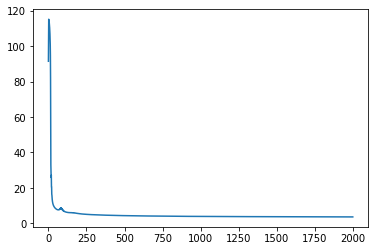

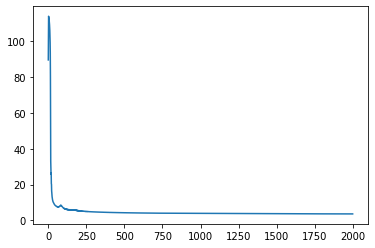

In [199]:
noOfLayers = 3
Activations = ['ReLU'] * (noOfLayers+1)

params, errors, val_errors = training(X_train, Y_train, X_val, Y_val, Activations, noOfLayers)


# print(errors[-1])
plt.plot(errors)
plt.show()
plt.plot(val_errors)
plt.show()

Testing the Network

In [200]:
y_out, error = testing(X_test, Y_test, params, Activations, noOfLayers)

print(y_out)
print(error)

[[10.56346071 19.43438512  2.32249372 ...  6.26059837 22.89478489
   5.66102375]]
[3.7479247]
